In [5]:
!pip install datascience
import pandas as pd
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [7]:
pwd

'/Users/edwardliu/Documents/dss-2019'

In [11]:
df = pd.read_csv('/Users/edwardliu/Documents/dss-2019/Data Frames/With Lengths.csv')
articles = Table.from_df(df).relabeled('headline length', 'length')
articles.show(3)

is_sarcastic,headline,article_link,length
1,thirtysomething scientists unveil doomsday clock of hair ...,https://www.theonion.com/thirtysomething-scientists-unve ...,61
0,dem rep. totally nails why congress is falling short on ...,https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,79
0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,49


## Permutation Test: Length of Headline

#### The below permutation test will use A/B testing to determine if length can be considered a factor when testing for sarcasm. By randomly shuffling the lengths and reassigning a sarcasm score, we can see if our discovery that sarcastic headlines are inherently longer is statistically sound.

*Null Hypothesis: ...*

*Alternative Hypothesis: ...*

*Test Statistic: ...*

In [12]:
sarcasm_and_length = articles.select('is_sarcastic','length')
sarcasm_and_length

is_sarcastic,length
1,61
0,79
0,49
1,52
1,61
0,20
0,42
1,88
1,73
0,34


In [14]:
sarcasm_and_length.sample(with_replacement = False).column('is_sarcastic')

array([0, 1, 1, ..., 0, 0, 1])

In [15]:
def difference_of_means(table, label, group_label):
    """Takes a table, the label of an integer column and a label to group by; Returns the difference of mean """
    #table with the two relevant columns
    reduced = table.select(label,group_label)
    
    #table containing group means
    means_table = reduced.group(group_label, np.average)
    
    #array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [16]:
observed_difference = difference_of_means(sarcasm_and_length,'length','is_sarcastic')

In [17]:
def one_simulated_difference(table,label,group_label):
    """Simulates one value of the difference of means"""
    #array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    #table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table,label, 'Shuffled Label')

In [18]:
one_simulated_difference(sarcasm_and_length,'length','is_sarcastic')

-0.014436606671701213

In [19]:
differences = make_array()

for i in np.arange(1000):
    simulated_difference = one_simulated_difference(sarcasm_and_length,'length','is_sarcastic')
    differences = np.append(differences,simulated_difference)

Observed Difference: 5.772385416564184


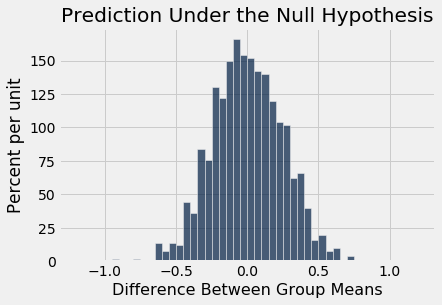

In [20]:
Table().with_column('Difference Between Group Means', differences).hist(bins = np.arange(-1.2,1.21,0.05))
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');

In [21]:
# Calculates the probability of getting a difference of means equal to or more in the direction 
# of the alternative(higher) than the observed test statistic

p_value = np.count_nonzero(differences >= observed_difference) / len(differences)
p_value

0.0